<h1 style="text-align: center">Ομαδική Εργασία 1<h1>
<h3 style="text-align: center">Σπανάκης Δημήτριος - 1115201800183</h3>
<h3 style="text-align: center">Σγούρδας Δημήτριος - 1115201800173</h3>

<h1>Σκέλος Α'</h1>

<h2>Διαχείρηση των Missing Data:</h2>
<p style="font-size:16px">
Για την διαχείριση των Missing Data επιλέξαμε, να συμπληρώσουμε τα πεδία που δεν έχουν τιμή, με την τιμή 'null' ώστε να είναι πιο διακριτά, κατά την εκτύπωση του data frame μας, δίνοντας μας και παραπάνω ευκολία στην διαχείριση του.
</p>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/My Drive/TEDE/Ergasia1/Resources/"
netflix_file = path + 'netflix_titles.csv'
movies_file = path + 'IMDb movies.csv'
ratings_file = path + 'IMDb ratings.csv'

# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv(netflix_file) 
# Manage missing data
df = df.fillna('null')
# df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h2>Ερώτημα 1:</h2>

Text(0, 0.5, '')

<Figure size 1440x216 with 0 Axes>

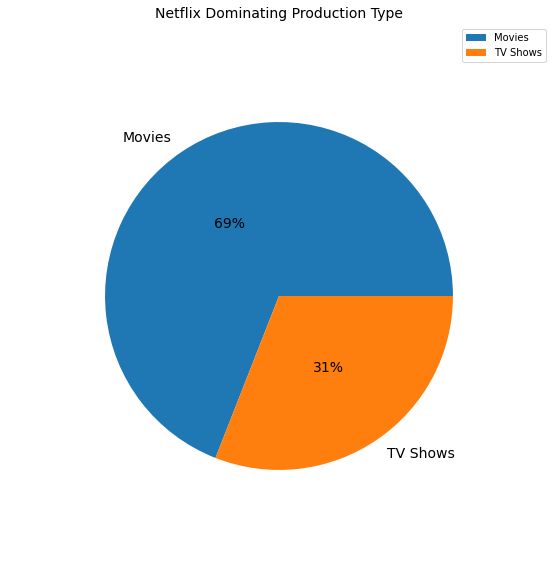

In [4]:
# Q1
# Make a frame out of value counts base on content type
dfQ1 = df['type'].value_counts().to_frame()

# Configure plot
plt.figure(figsize=(20, 3))
dfQ1.plot.pie(y='type', figsize=(10, 10), autopct='%1.0f%%', pctdistance=.5, radius=.8, textprops={'fontsize': 14}, labels=['Movies', 'TV Shows'])
plt.title("Netflix Dominating Production Type", fontsize=14)
plt.ylabel('')

<h3>Συπεράσματα Ερώτησης 1:</h3>
<p style="font-size:16px">
   Στο παραπάνω pie chart παρατηρούμε πως στο netflix έχουμε πολύ περισσότερες ταινίες από ότι σειρές. Ειδικότερα, υπάρχει αναλογία 2 προς 1 υπέρ των ταινιών έναντι των τηλεοπτικών σειρών.
</p>

<h2>Ερώτημα 2:</h2>

Text(0.5, 0, 'Year')

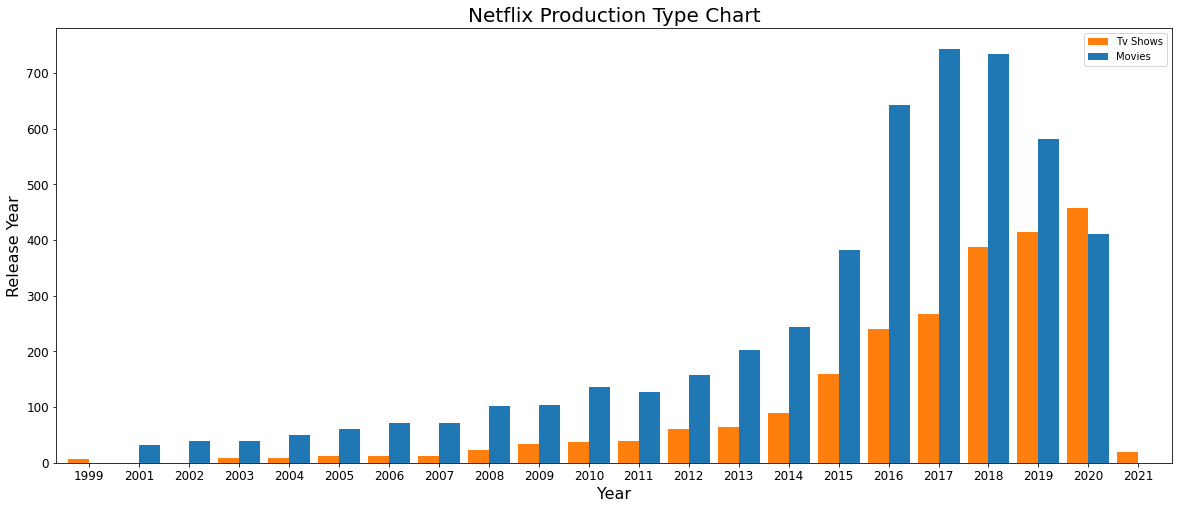

In [5]:
# Get value_counts of content type, and release years
dfQ2 = df[['type', 'release_year']].value_counts()

# Create data frame from last 20 years (years are presorted)
res = pd.DataFrame({'Tv Shows': dfQ2['TV Show'].head(20), 'Movies': dfQ2['Movie'].head(20)})

# Configure plot
res.plot.bar(rot=0, width=0.84, fontsize=12, figsize=(20,8), color=['tab:orange', 'tab:blue'])
plt.title("Netflix Production Type Chart", fontsize=20)
plt.ylabel('Release Year', size=16)
plt.xlabel('Year', size=16)

<h3>Συπεράσματα Ερώτησης 2:</h3>
<p style="font-size:16px">
   Στο παραπάνω γράφημα παρατηρούμε πώς από το <b>2015 εώς 2018</b> είχαμε "έκρηξη" στην παραγωγή ταινιών αλλά και σημαντική αύξηση στην παραγωγή Tv Show.<br>
   Όμως, από το <b>2019 μέχρι και σήμερα</b>, παρατηρούμε πως το Netflix έχει ξεκινήσει να <b>μειώνει τις επενδύσεις τις σε ταινίες</b>, και να προσφέρει αυτά τα χρήματα
   σε <b>παραγωγή περισσότερων τηλεοπτικών σειρών</b>, κάτι πολύ μας υποδεικνύει ότι η χρήστες της υπηρεσίας αυτής, εστιάζουν όλο και περισσότερο στο να παρακολουθούν σειρές.
</p>

<h2>Ερώτημα 3:</h2>

Text(0.5, 0, 'Countries')

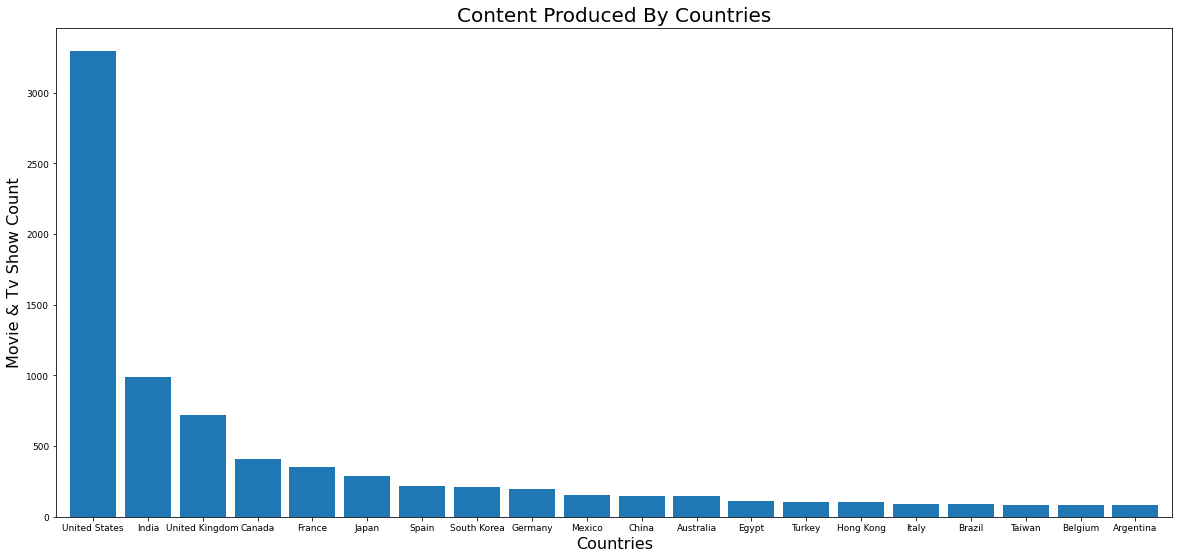

In [6]:
# Copy cur Df to new var
dfT = df
# Break on ', ' and expand country rows
dfT = dfT.assign(country=dfT['country'].str.split(', ')).explode('country')
# Get appearance count for each country
dfQ3 = dfT[['country']].value_counts()
# Group by Country
obj = dfQ3.groupby('country')
dfQ3 = obj.sum()
# print(dfQ3)
# Sort values descending
dfQ3 = dfQ3.sort_values(axis=0, ascending=False, inplace=False)
# Drop 'null fields'
dfQ3 = dfQ3.drop(labels=['null'])
# Configure plot
dfQ3.iloc[0:20].plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9))
plt.title("Content Produced By Countries", fontsize=20)
plt.ylabel('Movie & Tv Show Count', size=16)
plt.xlabel('Countries', size=16)


<h3>Συπεράσματα Ερώτησης 3:</h3>
<p style="font-size:16px">
Όπως είναι προφανές, οι Αμερικάνοι είναι εκείνοι που έχουν τις μεγαλύτερες παραγωγές σε περιεχόμενο. Αυτό είναι πλήρως αναμενόμενο, καθώς το ίδιο το Netflix, αποτελεί Αμερικάνικη εταιρία, και έτσι μπορεί εύκολα να επενδύει τα έσοδα της για την δημιουργία νέου υλικού κάθε φορά. Τέλος, ας μην μιλήσουμε για τις συνήθειες των αμερικάνων, που οι περισσότεροι περνούν τον ελεύθερο τους χρόνο, βλέποντας ταινίες και σειρές.<br>
<h5>Σημείωση:</h5>
<p style="font-size:16px">Στο παραπάνω γράφημα, φαίνονται σε φθίνουσα σειρά, οι πρώτες 20 χώρες με το περισσότερο περιεχόμενο, μιας και είναι αρκετές για να λάβουμε συμπέρασμα.
</p>
</p>

<h2>Ερώτημα 4:</h2>

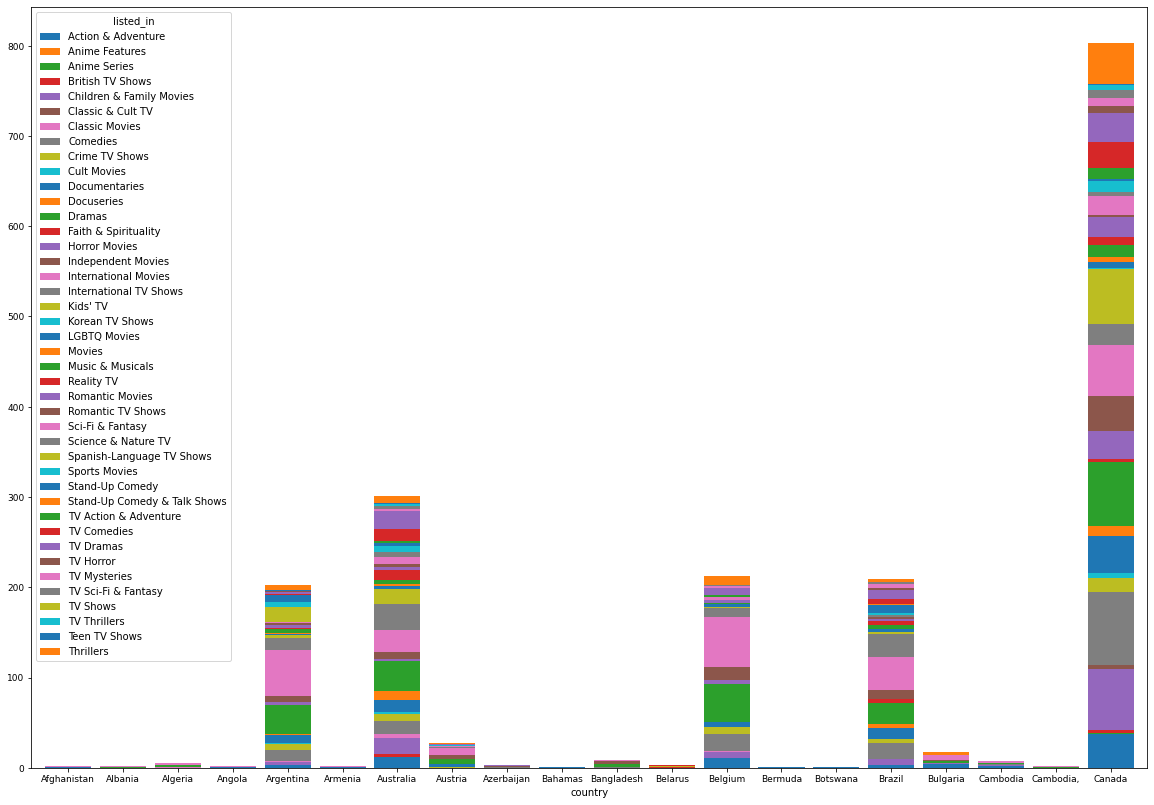

In [7]:
dfQ4 = df

# dfQ4.reset_index(inplace=True)
dfQ4 = df[['country', 'listed_in']]
# Explode on listed_in and country fields
dfQ4 = dfQ4.assign(listed_in=dfQ4['listed_in'].str.split(', ')).explode('listed_in')
dfQ4 = dfQ4.assign(country=dfQ4['country'].str.split(', ')).explode('country')
# Drop null fields
dfQ4 = dfQ4[dfQ4['country'] != 'null']
dfQ4 = dfQ4[dfQ4['listed_in'] != 'null']
# Get value counts of Country/Genre
dfQ4 = dfQ4.value_counts()
# print(dfQ4)
# Sort values descending
dfQ4 = dfQ4.sort_values(axis=0, ascending=False, inplace=False)
# Convert to frame
dfQ4 = dfQ4.to_frame()
# Reset index (fix frame presentation)
dfQ4.reset_index(inplace=True)
# Keep only necessary columns
dfQ4.columns = ['country', 'listed_in', 'count']
# Configure plot
dfQ4 = dfQ4.pivot_table(index='country', columns = 'listed_in', values='count').head(20)
dfQ4.plot.bar(rot=0, width=.84, fontsize=9, figsize=(20,14),stacked=True)


<h3>Συπεράσματα Ερώτησης 4:</h3>
<p style="font-size:16px">
Για το 4ο ερώτημα. αντί να εκτυπώσουμε για κάθε χώρα ένα ξεχωριστό pie chart, θεωρήσαμε πως θα ήταν καλύτερο να δημιουργήσουμε ένα stacked bar chart. Το κύριο πλεονέκτημα, είναι ότι μπορούμε να δούμε πως είναι κατανεμημένο το περιεχόμενο σε κάθε χώρα, αλλά και πόσο είναι αυτο το περιεχόμενο σε σχέση με τις άλλες χώρες. Συνεπώς το παραπάνω stacked bar chart, είναι πολύ καλύτερο, από τα επιμέρους pie charts που θα είχαμε. 
<h5>Σημείωση:</h5>
<p style="font-size:16px">Στο παραπάνω γράφημα, φαίνονται σε αλφαβητική σειρά, οι πρώτες 20 χώρες με το συνολικό περιεχόμενο τους, ενώ τα διάφορα χρώματα αντιστοιχίζονται στα διάφορα genres που υπάρχουν.
</p>
</p>

<h2>Ερώτημα 5:</h2>

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


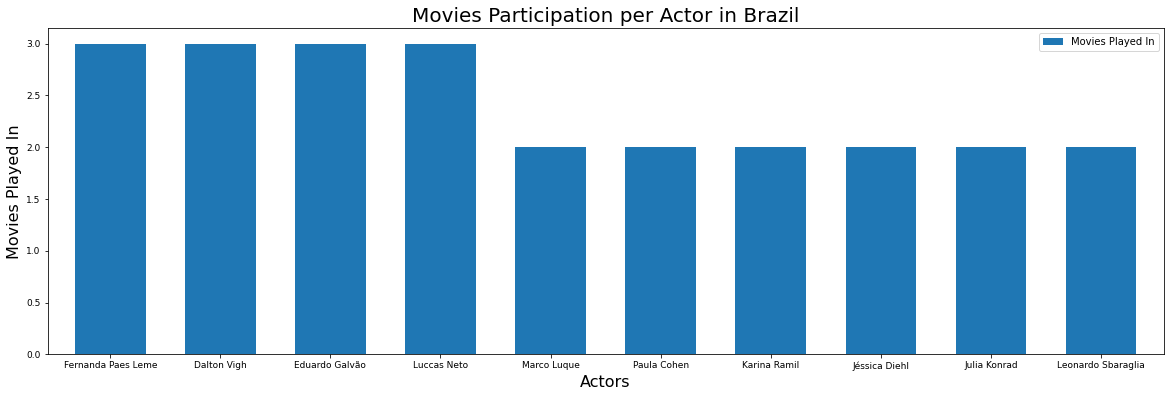

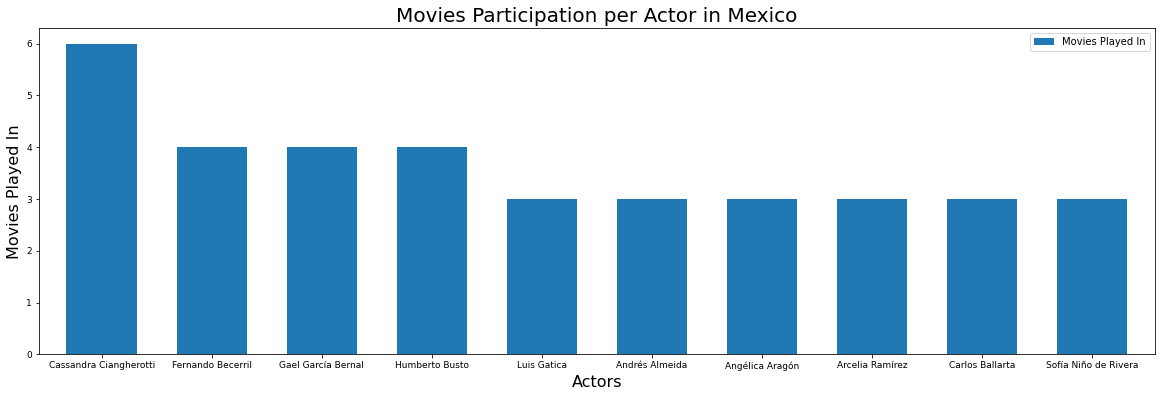

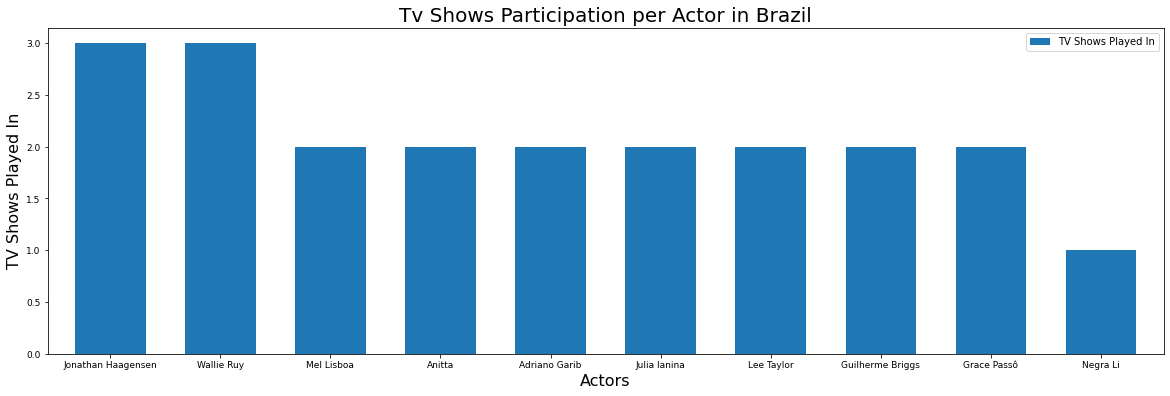

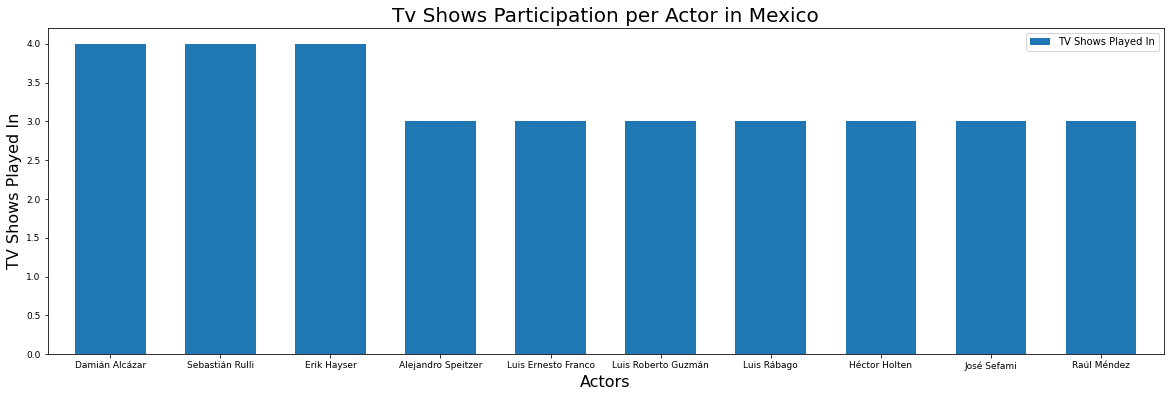

In [8]:
dfQ5 = df
# Keep necessary columns
dfQ5 = dfQ5[['type', 'country', 'cast']]
# Explode on cast and country field
dfQ5 = dfQ5.assign(cast=dfQ5['cast'].str.split(', ')).explode('cast')
dfQ5 = dfQ5.assign(country=dfQ5['country'].str.split(', ')).explode('country')

# Save cur df
dfQ5_save = dfQ5
uniqueCountries = dfQ5['country'].unique().tolist()
# Drop 'null' and keep Movie Content type
dfQ5 = dfQ5[dfQ5['type'] == 'Movie']
dfQ5 = dfQ5[dfQ5['cast'] != 'null']
dfQ5 = dfQ5[dfQ5['country'] != 'null']

# Get value counts
dfQ5 = dfQ5.value_counts(sort=True)
# Convert to frame and reset index
dfQ5 = dfQ5.to_frame()
dfQ5.reset_index(inplace=True)
# Define necessary columns
dfQ5.columns = ['type', 'country', 'cast', 'count']
dfQ5.drop('type', inplace=True, axis=1)

# Print for each country -- remove [:2] to show all countries
for curCountry in uniqueCountries[:2]:
    # Get rows
    dfQ5N = dfQ5[dfQ5['country'] == curCountry]
    # Drop country column
    dfQ5N.drop('country', inplace=True, axis=1)
    dfQ5N.columns = ['Actors', 'Movies Played In']
    # Get top 10 actors with their movies played in
    x = dfQ5N['Actors'].head(10).to_list()
    y = dfQ5N['Movies Played In'].head(10).to_list()
    # If we have a result for that Country
    if not dfQ5N.empty:
        # Configure plot
        dfQ5N.head(10).plot.bar(x='Actors', y='Movies Played In',subplots=True, rot=0, width=0.64, fontsize=9, figsize=(20,6))

        curTitle = "Movies Participation per Actor in " + str(curCountry)
        plt.title(curTitle, fontsize=20)
        plt.xlabel('Actors',fontsize=16)
        plt.ylabel('Movies Played In', fontsize=16)
    else:
        print('NO RECORDS FOR COUNTRY ' + curCountry)

# Same goes for tv shows
dfQ5 = dfQ5_save
dfQ5 = dfQ5[dfQ5['type'] == 'TV Show']
dfQ5 = dfQ5[dfQ5['cast'] != 'null']
dfQ5 = dfQ5[dfQ5['country'] != 'null']

dfQ5 = dfQ5.value_counts(sort=True)
dfQ5 = dfQ5.to_frame()
dfQ5.reset_index(inplace=True)
dfQ5.columns = ['type', 'country', 'cast', 'count']
dfQ5.drop('type', inplace=True, axis=1)

for curCountry in uniqueCountries[:2]: 
    dfQ5N = dfQ5[dfQ5['country'] == curCountry]
    dfQ5N.drop('country', inplace=True, axis=1)
    dfQ5N.columns = ['Actors', 'TV Shows Played In']
    x = dfQ5N['Actors'].head(10).to_list()
    y = dfQ5N['TV Shows Played In'].head(10).to_list()
    if not dfQ5N.empty:
        # plt.subplot(2,1,curPlotCount)
        dfQ5N.head(10).plot.bar(x='Actors', y='TV Shows Played In', subplots=True, rot=0, width=0.64, fontsize=9, figsize=(20,6))

        curTitle = "Tv Shows Participation per Actor in " + str(curCountry)
        plt.title(curTitle, fontsize=20)
        plt.xlabel('Actors',fontsize=16)
        plt.ylabel('TV Shows Played In', fontsize=16)
    else:
        print('NO RECORDS FOR COUNTRY ' + curCountry)



<h3>Συπεράσματα Ερώτησης 5:</h3>
<p style="font-size:16px">
Στο 5ο ερώτημα, εμφανίζονται σε bar plot, οι ηθοποιοί που έχουν κάνει τις περισσότερες εμφανίσεις σε τανίες και ύστερα σε σειρές, ανάλογα την χώρα. Επιλέξαμε να εμφανίσουμε τους 10 πιο ενεργούς, για κάθε χώρα.
<h5>Σημείωση:</h5>
<p style="font-size:16px">Στα παραπάνω γραφήματα, εμφανίζονται μόνο δύο χώρες από κάθε είδος περιεχομένου(σειρές και ταινίες) έτσι ώστε να μειωθεί το spam κατά την διόρθωση. 
</p>
</p>

<h2>Ερώτημα 6:</h2>

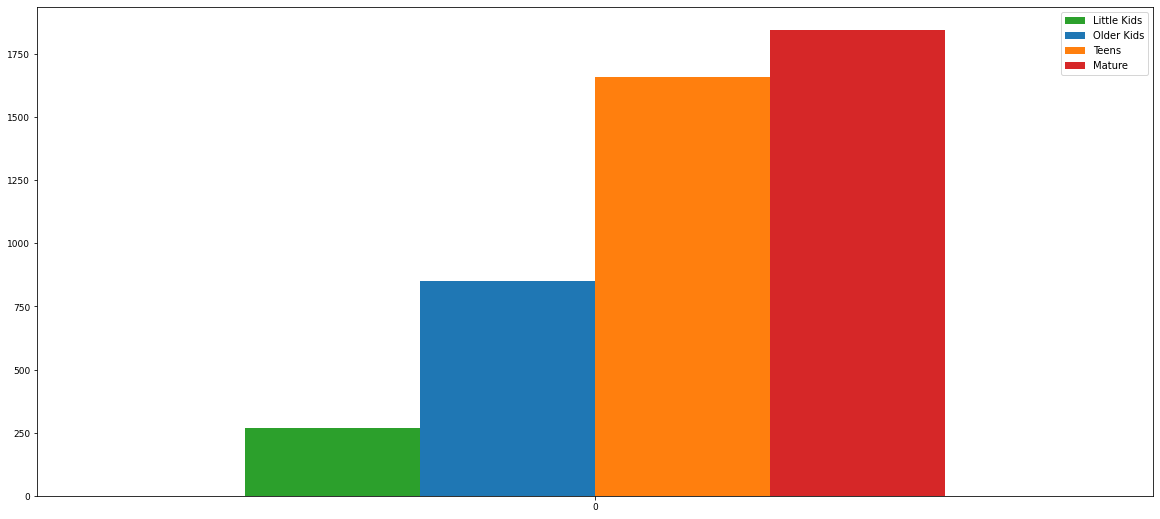

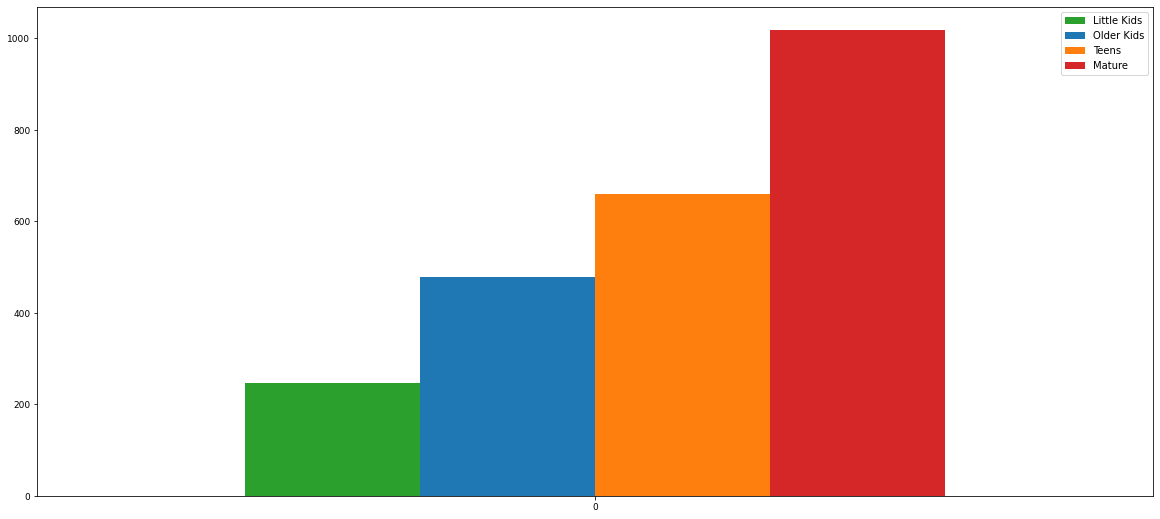

In [9]:
dfQ6 = df
# Get type adn rating columns
dfQ6 = dfQ6[['type', 'rating']]
# Get only movies, and also remove null entries
dfQ6 = dfQ6[dfQ6['type'] == 'Movie']
dfQ6 = dfQ6[dfQ6['rating'] != 'null']
# Make lists the categories, containing the raitings
littleKids = ['G', 'TV-Y', 'TV-G']
olderKids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
teens = ['PG-13', 'TV-14']
mature = ['R' 'NC-17', 'TV-MA']
# Make a dataframe for each age category
dfQ6LK = dfQ6[dfQ6['rating'].isin(littleKids)]
dfQ6OK = dfQ6[dfQ6['rating'].isin(olderKids)]
dfQ6T = dfQ6[dfQ6['rating'].isin(teens)]
dfQ6M = dfQ6[dfQ6['rating'].isin(mature)]
# Get the value counts for each data frame
dfQ6LK = dfQ6LK.value_counts()
dfQ6OK = dfQ6OK.value_counts()
dfQ6T = dfQ6T.value_counts()
dfQ6M= dfQ6M.value_counts()
# Configure plot
dfQ6Final = pd.DataFrame({'Little Kids':[dfQ6LK.sum()], 'Older Kids': [dfQ6OK.sum()], 'Teens':[dfQ6T.sum()], 'Mature': [dfQ6M.sum()]})
dfQ6Final.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:green', 'tab:blue', 'tab:orange', 'tab:red'])
# Repeat the same for tv shows
dfQ6 = df
dfQ6 = dfQ6[['type', 'rating']]

dfQ6 = dfQ6[dfQ6['type'] == 'TV Show']
dfQ6 = dfQ6[dfQ6['rating'] != 'null']

littleKids = ['G', 'TV-Y', 'TV-G']
olderKids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
teens = ['PG-13', 'TV-14']
mature = ['R' 'NC-17', 'TV-MA']

dfQ6LK = dfQ6[dfQ6['rating'].isin(littleKids)]
dfQ6OK = dfQ6[dfQ6['rating'].isin(olderKids)]
dfQ6T = dfQ6[dfQ6['rating'].isin(teens)]
dfQ6M = dfQ6[dfQ6['rating'].isin(mature)]

dfQ6LK = dfQ6LK.value_counts()
dfQ6OK = dfQ6OK.value_counts()
dfQ6T = dfQ6T.value_counts()
dfQ6M= dfQ6M.value_counts()

dfQ6Final = pd.DataFrame({'Little Kids':[dfQ6LK.sum()], 'Older Kids': [dfQ6OK.sum()], 'Teens':[dfQ6T.sum()], 'Mature': [dfQ6M.sum()]})
dfQ6Final.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:green', 'tab:blue', 'tab:orange', 'tab:red'])

<h3>Συπεράσματα Ερώτησης 6:</h3>
<p style="font-size:16px">
Από ότι βλέπουμε, παρότι υπάρχει περιεχόμενο για κάθε ηλικιακή κατηγορία, η αναλογία δεν είναι σε καμία περίπτωση ίση. Παρατηρούμε ότι όσο πιο νεότερη είναι μία κατηγορία χρηστών του Netflix, τόσο λιγότερο είναι το περιεχόμενο που έχει διαθέσιμο. Μάλιστα, παρατηρούμε ότι για τις ταινίες το επίκεντρο είναι κατά πολύ οι μεγαλύτερες ηλικίες (η άνοδος σε περιεχόμενο μοιάζει λογαριθμική), ενώ για τις σειρές η αύξηση ανά κατηγορία είναι πιο σταθερή (κοντά σε γραμμική). Αυτό βγάζει και νόημα, καθώς οι άνθρωποι όσο μεγαλώνουν έχουν λιγότερο διαθέσιμο χρόνο για να δώσουν σε μια ολόκληρη σειρά από ότι σε μια ταινία, ενώ για τα παιδιά συνήθως ισχύει το αντίθετο.<br>
<h5>Σημείωση:</h5>
<p style="font-size:16px">Κάθε χρώμα για κάθε κατηγορία αντιστοιχεί και στα χρώματα που χρησιμοποιείται για την καταλληλότητα των τηλεοπτικών προγραμμάτων, για γρήγορη αναγνώριση.
</p>
</p>

<h2>Ερώτημα 7:</h2>

Text(0.5, 0, 'Month')

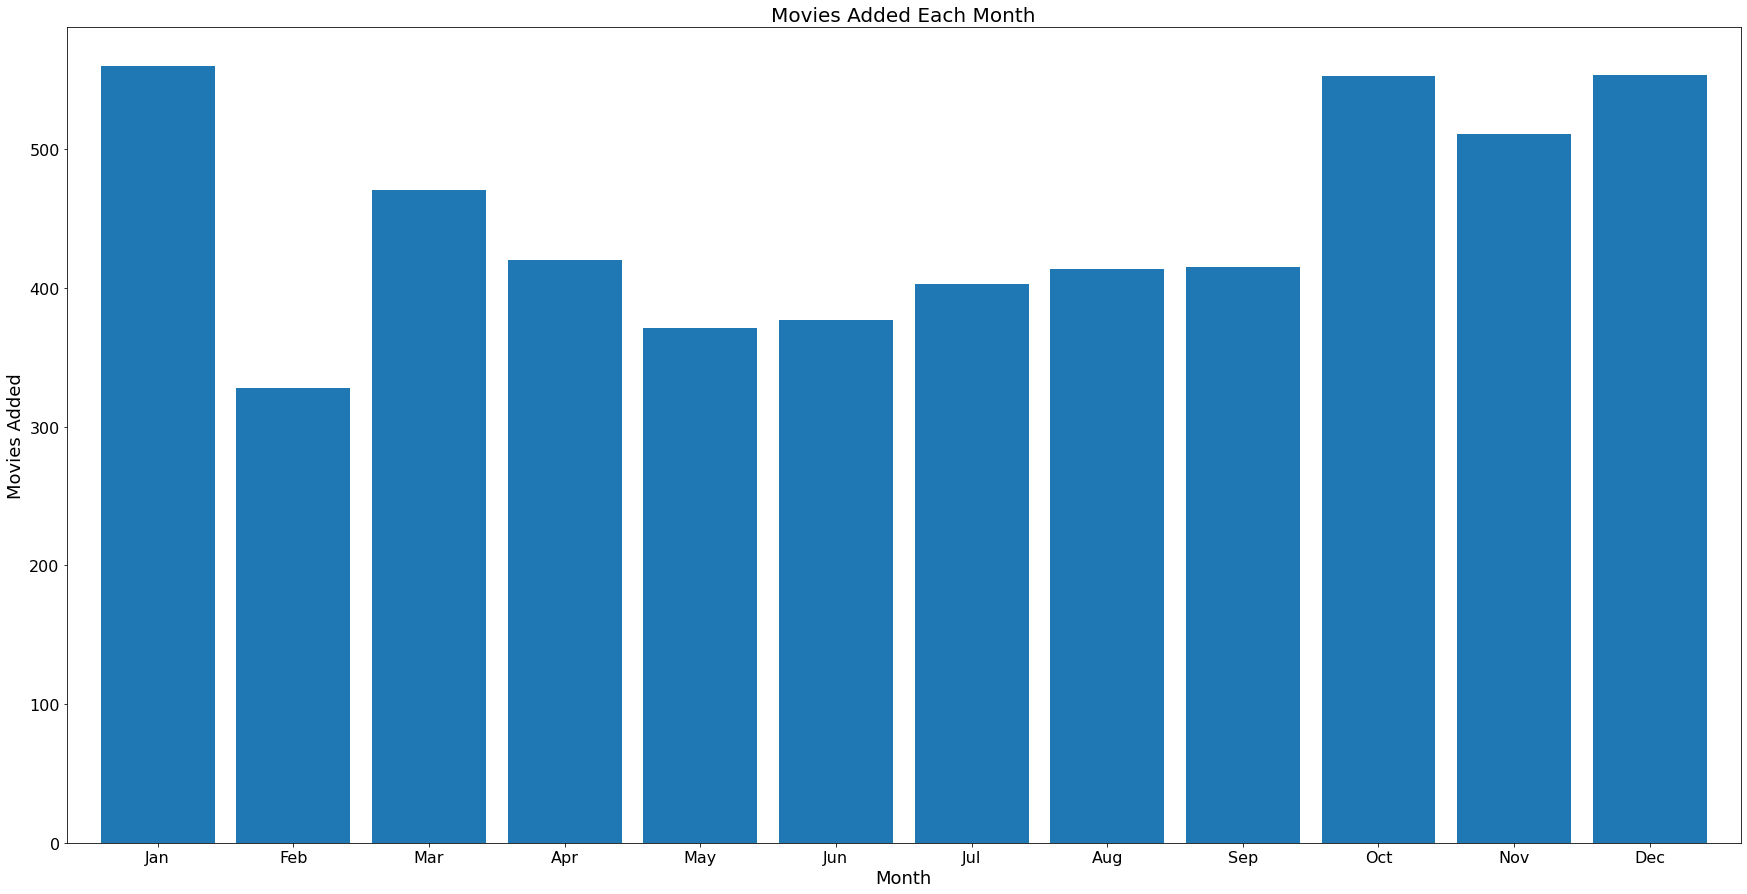

In [10]:
dfQ7 = df
# Get type and date added columsn from data frame
dfQ7 = dfQ7[['type', 'date_added']]
# Filter out tv shows and keep movies
dfQ7 = dfQ7[dfQ7['type'] == 'Movie']
# Remove missing fields
dfQ7 = dfQ7[dfQ7['date_added'] != 'null']
# Make a column containing only the month for us to categorise by
dfQ7['month'] = pd.DatetimeIndex(dfQ7['date_added']).month
# Drop not needed columns
dfQ7.drop('date_added', inplace=True, axis=1)
dfQ7.drop('type', inplace=True, axis=1)
# Value count to sum up data
dfQ7 = dfQ7.value_counts()
# Convert to dataframe
dfQ7 = dfQ7.to_frame()
# Reset index of month to manipulate
dfQ7 = dfQ7.reset_index(inplace=False)
# Rename columns
dfQ7.columns = ['Month', 'Movies Added']
# Sort values of df
dfQ7 = dfQ7.sort_values(by='Month', axis=0, ascending=True, inplace=False)
# Rename month column for better presentation
dfQ7['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Set month back as index
dfQ7 = dfQ7.set_index('Month')
# Plot movies added
dfQ7['Movies Added'].plot.bar(rot=0, width=0.84, fontsize=16, figsize=(30,15))
# Configuration of plot
plt.title("Movies Added Each Month", fontsize=20)
plt.ylabel('Movies Added', size=18)
plt.xlabel('Month', size=18)

<h3>Συπεράσματα Ερώτησης 7:</h3>
<p style="font-size:16px">
Στο γράφημα αναπαρίσταται ο χρόνος στον οριζόντιο άξονα (διατεταγμένος σε μήνες) και το πλήθος των ταινιών που προστίθενται στον κάθετο. Ένας παραγωγός, έυκολα, μπορεί να παρατηρήσει ότι υπάρχει ένα μεγάλο κενό στο πόσες ταινίες προστίθενται ανά μήνα, για τον Φεβρουάριο. Επίσης, φαίνεται ότι αν δεν επιθυμεί να διαλέξει τον Φλεβάρη, ο Μάϊος και ο Ιούνιος είναι επίσης δύο πολύ καλές επιλογές. Έτσι μπορεί να επιλέξει τον μήνα τον οποίο θα βγάλει την ταινία του, ώστε να έχει τον μικρότερο ανταγωνισμό.<br>
</p>

<h2>Ερώτημα 8:</h2>

Text(0, 0.5, '')

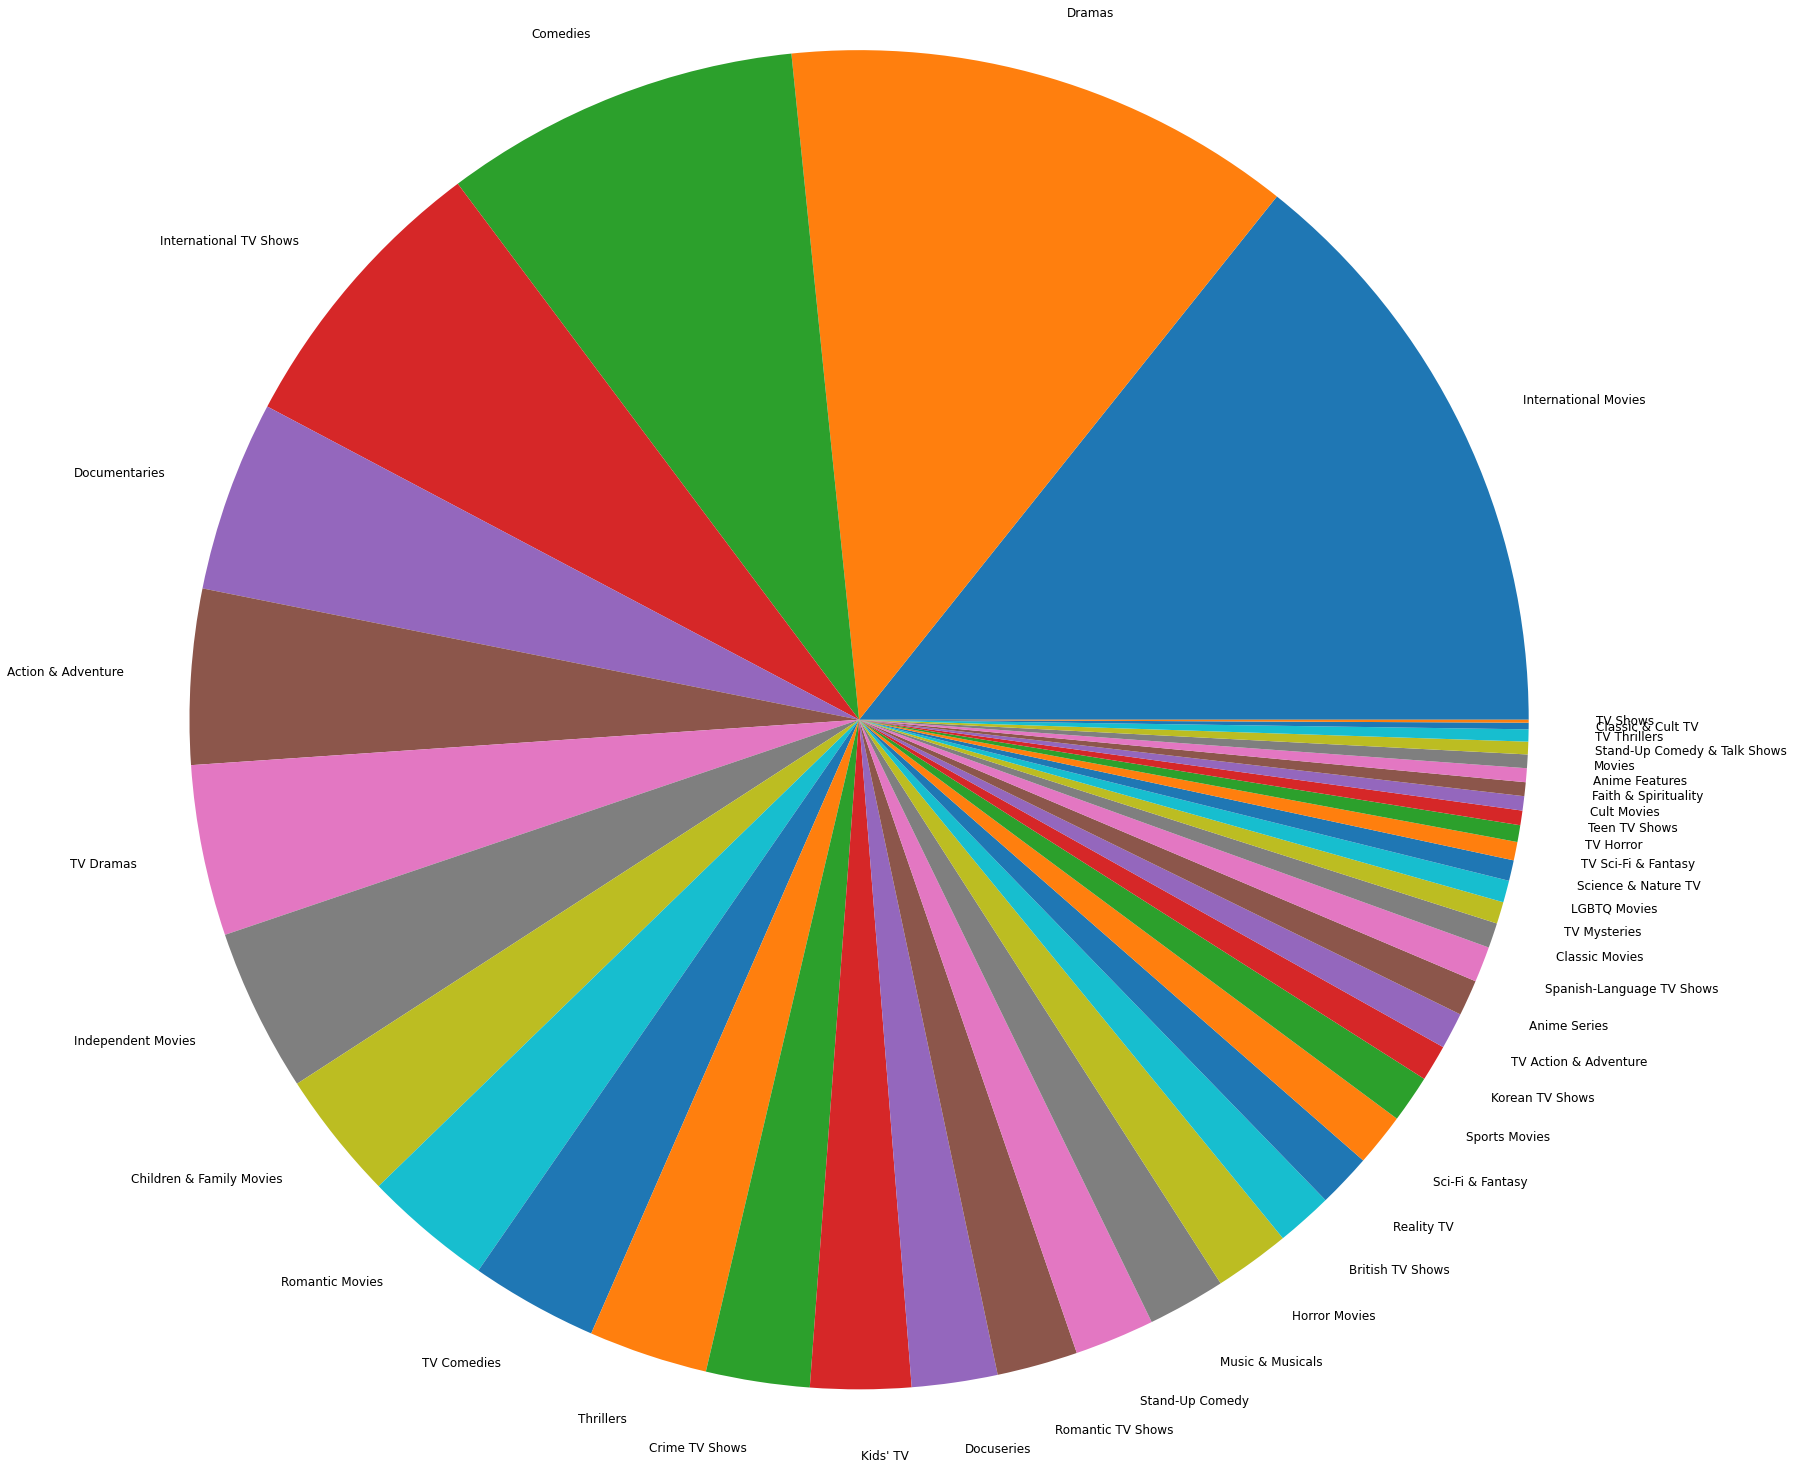

In [11]:
dfQ8 = df
# Get only listed_in column
dfQ8 = dfQ8[['listed_in']]
# Explode listed in column for multiple types of content
dfQ8 = dfQ8.assign(listed_in=dfQ8['listed_in'].str.split(', ')).explode('listed_in')
# Count values to prepare data
dfQ8 = dfQ8.value_counts()
# Reset index for plot
dfQ8temp = dfQ8.to_frame().reset_index()
# Plot data
dfQ8.plot.pie(y='listed_in', figsize=(10, 50), radius=3, textprops={'fontsize': 12}, labels=dfQ8temp['listed_in'].to_list())
plt.ylabel('')

<h3>Συπεράσματα Ερώτησης 8:</h3>
<p style="font-size:16px">
Το άνω pie chart, αποτελεί μία πολύ καλή αναπαράσταση, για κάποιον που θέλει να δει μαζεμένη την πληροφορία για το είδος του περιεχομένου που προσφέρει το Netflix. Υπάρχει ένα χρώμα, ενώ δίπλα στο μέρος που καταλαμβάνει στο σύνολο υπάρχει και η υπόδειξη για το είδος του συγκεκριμένου κομματιού. Για παράδειγμα, είναι ξεκάθαρο (και αναμενόμενο) πως οι διεθνείς ταινίες έχουν το προβάδισμο, ενώ λίγο πίσω τους είναι τα δράματα.<br>
</p>
</p>

<h2>Ερώτημα 9:</h2>

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


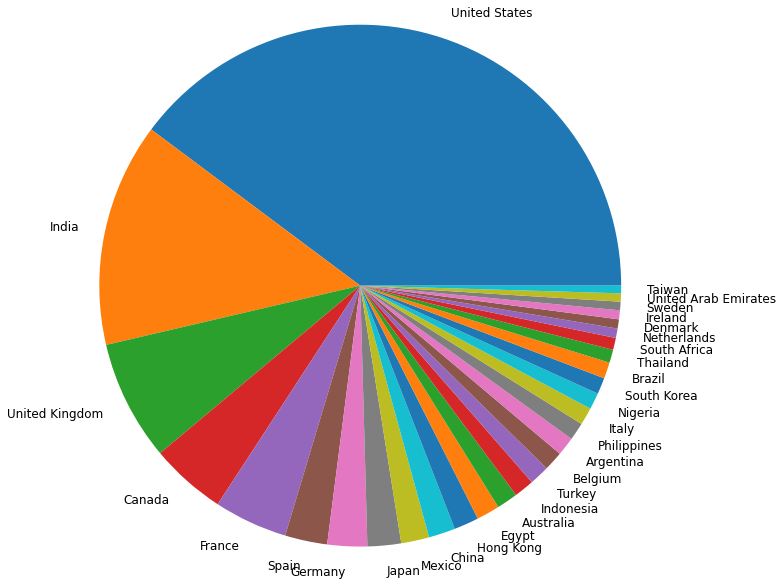

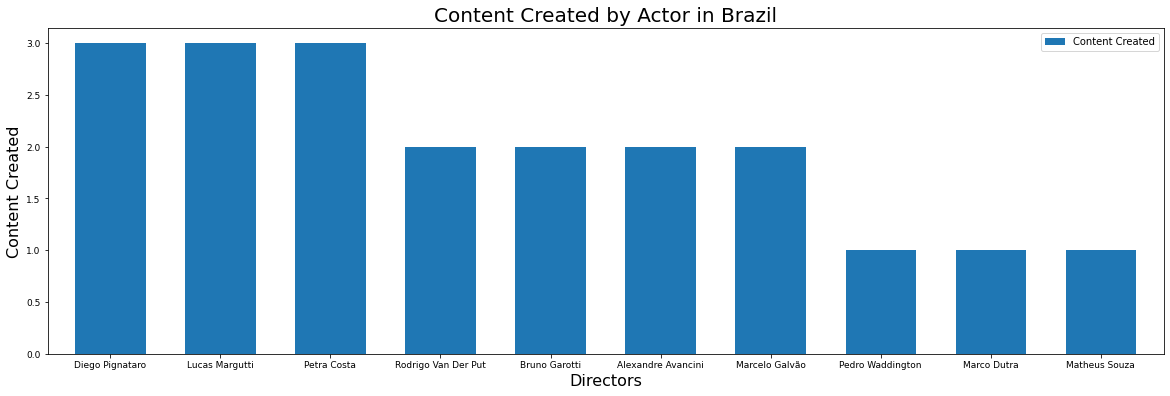

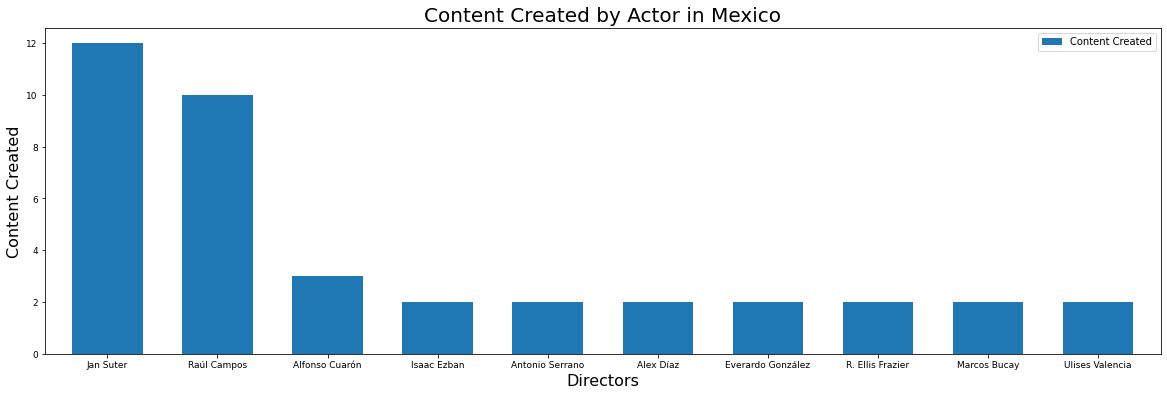

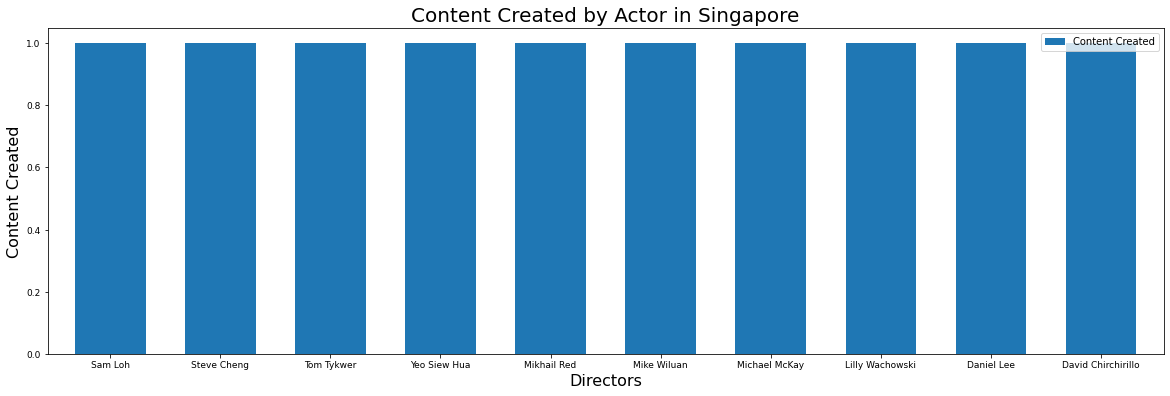

In [12]:
dfQ9 = df
# First type of graphs
# Get country and director columns from df
dfQ9 = dfQ9[['country', 'director']]
# Filter out null entries
dfQ9 = dfQ9[dfQ9['director'] != 'null']
dfQ9 = dfQ9[dfQ9['country'] != 'null']
# Explode directors and countries for correct representation
dfQ9 = dfQ9.assign(director=dfQ9['director'].str.split(', ')).explode('director')
dfQ9 = dfQ9.assign(country=dfQ9['country'].str.split(', ')).explode('country')
# Value count country column
dfQ9 = dfQ9['country'].value_counts()
# Present data in pie chart
dfQ9.head(30).plot.pie(y='country', radius=3, textprops={'fontsize': 12})
plt.ylabel('')

# Second type of graphs

dfQ9 = df
# Keep necessary columns
dfQ9 = dfQ9[['country', 'director']]
# Explode on cast and country field
dfQ9 = dfQ9.assign(director=dfQ9['director'].str.split(', ')).explode('director')
dfQ9 = dfQ9.assign(country=dfQ9['country'].str.split(', ')).explode('country')

# Save cur df
dfQ9_save = dfQ9
uniqueCountries = dfQ9['country'].unique().tolist()
# Drop 'null' and keep Movie Content type
dfQ9 = dfQ9[dfQ9['director'] != 'null']
dfQ9 = dfQ9[dfQ9['country'] != 'null']

# Get value counts
dfQ9 = dfQ9.value_counts(sort=True)
# Convert to frame and reset index
dfQ9 = dfQ9.to_frame()
dfQ9.reset_index(inplace=True)
# Define necessary columns
dfQ9.columns = ['country', 'cast', 'count']

# For each country -- remove [:3] to show all countries
for curCountry in uniqueCountries[:3]:
    # Get rows
    dfQ9N = dfQ9[dfQ9['country'] == curCountry]
    # Drop country column
    dfQ9N.drop('country', inplace=True, axis=1)
    dfQ9N.columns = ['Directors', 'Content Created']
    # Get top 10 actors with their movies played in
    x = dfQ9N['Directors'].head(10).to_list()
    y = dfQ9N['Content Created'].head(10).to_list()
    # If we have a result for that Country
    if not dfQ9N.empty:
        # Configure plot
        dfQ9N.head(10).plot.bar(x='Directors', y='Content Created',subplots=True, rot=0, width=0.64, fontsize=9, figsize=(20,6))

        curTitle = "Content Created by Actor in " + str(curCountry)
        plt.title(curTitle, fontsize=20)
        plt.xlabel('Directors',fontsize=16)
        plt.ylabel('Content Created', fontsize=16)
    else:
        print('NO RECORDS FOR COUNTRY ' + curCountry)


<h3>Συπεράσματα Ερώτησης 9:</h3>
<p style="font-size:16px">
Το πρώτο γράφημα παραπάνω μας δίνει μια ιδέα για το πόσοι σκηνοθέτες έχουν σκηνοθετήσει σε κάθε χώρα. Όπως και είναι αναμενόμενο, η Αμερική και η Ινδία είναι οι πρώτοι σε αυτή την κατάταξη.<br>
</p>
<p style="font-size:16px">
Για το δεύτερο γράφημα, αποφασίσαμε να δημιουργήσουμε τους σκηνοθέτες με τις περισσότερες παραγωγές στην κάθε χώρα. Στα από πάνω γραφήματα εμφανίζονται οι 10 σκηνοθέτες με το περισσότερο περιεχόμενο.
</p>

<h2>Ερώτημα 10:</h2>

([<matplotlib.axis.YTick at 0x7f10a055e850>,
 <a list of 17 Text major ticklabel objects>)

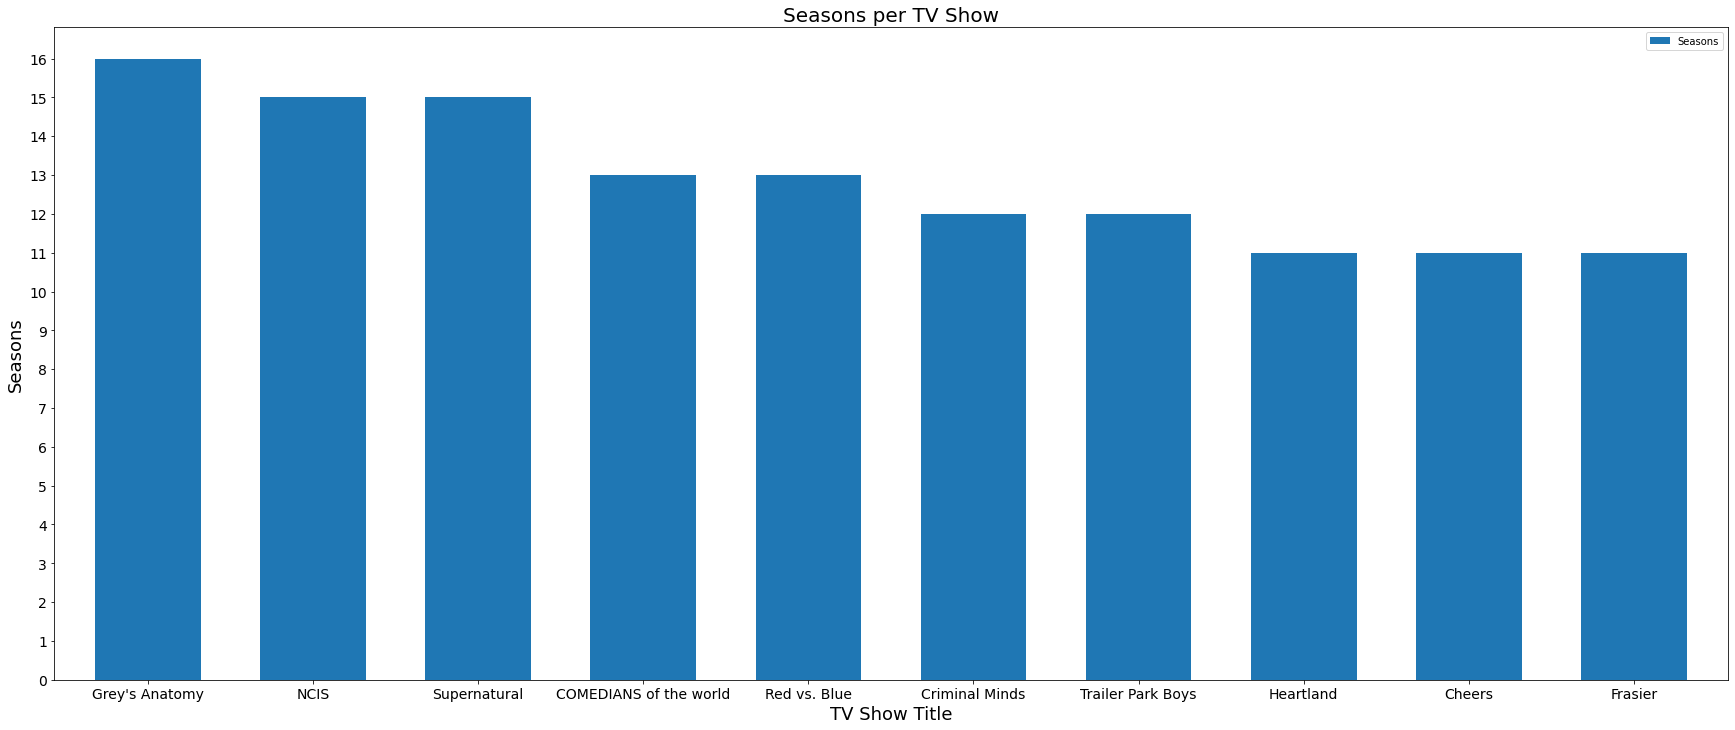

In [13]:
dfQ10 = df
# Grab title and duration columns for tv shows
dfQ10 = dfQ10[dfQ10['type'] == 'TV Show']
dfQ10 = dfQ10[['title', 'duration']]
# Leave null fields out
dfQ10 = dfQ10[dfQ10['title'] != 'null']
dfQ10 = dfQ10[dfQ10['duration'] != 'null']
# Delete seasons string from duration fields
dfQ10['duration'] = dfQ10['duration'].str.replace(' Seasons', '').str.replace(' Season', '')
# Convert to numbers
dfQ10['duration'] = pd.to_numeric(dfQ10['duration'])
dfQ10 = dfQ10.sort_values(by='duration', ascending=False, inplace=False)
# Define needed columns
dfQ10.columns = ['Title', 'Seasons']
# Configure plot
dfQ10.head(10).plot.bar(x='Title', y='Seasons', rot=0, width=0.64, fontsize=14, figsize=(30,12))
plt.title("Seasons per TV Show", fontsize=20)
plt.ylabel('Seasons', size=18)
plt.xlabel('TV Show Title', size=18)
# Define yticks
plt.yticks(list(range(0, dfQ10['Seasons'].max() + 1)))



<h3>Συπεράσματα Ερώτησης 10:</h3>
<p style="font-size:16px">
Στο γράφημα αυτό, έχουμε την αναπαράσταση της σχέσης σειρών/σεζόν. Στον οριζόντιο άξονα έχουμε τις σειρές με τους τίτλους τους και στον κάθετο τους κύκλους. Βλέπουμε έτσι έυκολα τις σειρές με τους περισσότερους κύκλους, το οποίο είναι και ένα κριτήριο για το πόσο καλά έχουν πάει.<br>
<h5>Σημείωση:</h5>
<p style="font-size:16px">Επιλέξαμε να παρουσιάσουμε τις 10 πρώτες.
</p>
</p>

<h2>Ερώτημα 11:</h2>

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


([<matplotlib.axis.YTick at 0x7f109ae54690>,
 <a list of 21 Text major ticklabel objects>)

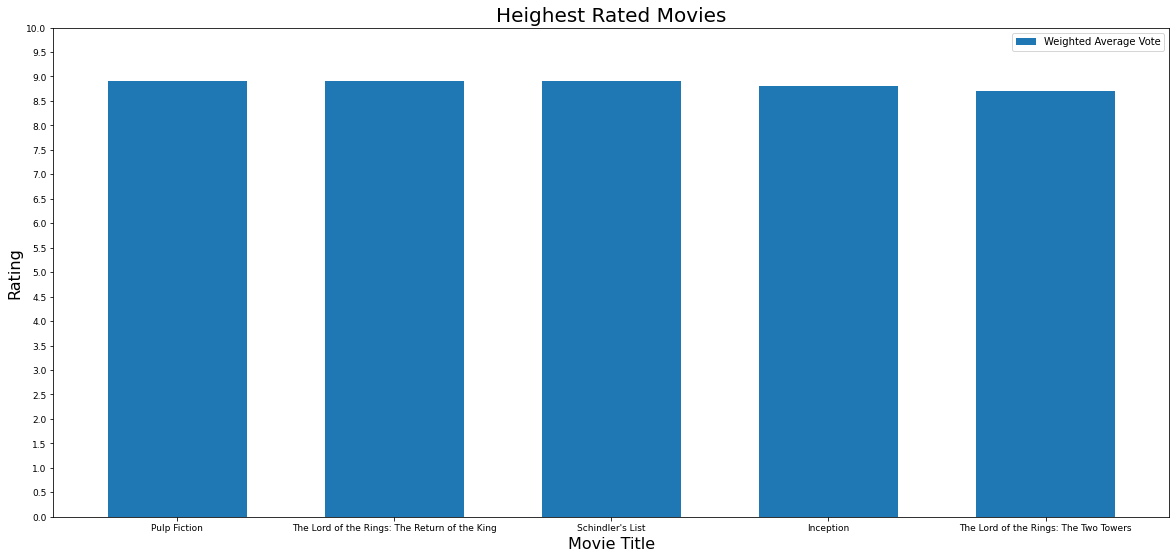

In [14]:
df_movies = pd.read_csv(movies_file)
df_ratings = pd.read_csv(ratings_file)

dfQ11 = df
# Grab only movies
dfQ11 = dfQ11[dfQ11['type'] == 'Movie']
# Merge netflix database with movies from imdb database in a dataframe
dfQ11 = pd.merge(df, df_movies, left_on=['title', 'release_year'], right_on=['original_title', 'year']) # Join on two fields cause of remakes -- avoid false join
# Grab only needed columns
dfQ11 = dfQ11[['title_x', 'imdb_title_id']]
# Merge dataframe with ratings from imdb database
dfQ11 = pd.merge(dfQ11, df_ratings, on='imdb_title_id')
# Rate based on the weighted_average_vote
dfQ11 = dfQ11[['weighted_average_vote', 'title_x']]
# Sort by vote
dfQ11 = dfQ11.sort_values(by='weighted_average_vote', ascending=False, inplace=False)
# Rename columns for presentation
dfQ11.columns = ['Weighted Average Vote', 'Title']
# Present with a plot bar
dfQ11.head(5).plot.bar(x='Title', y='Weighted Average Vote', rot=0, width=0.64, fontsize=9, figsize=(20,9))
# Configure plot
import numpy as np 
plt.title("Heighest Rated Movies", fontsize=20)
plt.xlabel('Movie Title',fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.yticks(np.arange(0, 10.5, step=0.5))


<h3>Συπεράσματα Ερώτησης 11:</h3>
<p style="font-size:16px">
Στο παραπάνω γράφημα, βλέπουμε τις 5 Ταινίες που υπάρχουν στο Netflix και έχουν την μεγαλύτερη βαθμολογία στο IMDb. Για να το καταφέρουμε αυτό, κάναμε inner joins, πάνω στα πεδία imbd_title_id των αρχείων IMDb_movies.csv και IMDb_ratings.csv, στο πεδίο title του netflix_titles.csv, αλλά και στο πεδίο year/release_year, για την αποφυγή λαθών σε περίπτώσεις title duplicate που διαπιστώσαμε ότι υπάρχουν.<br>
</p>
</p>

<h1>Σκέλος Β'</h2>

<h3>Ερώτημα 1:</h1>

In [15]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

dfB = df
# Grab movies
dfB = dfB[dfB['type'] == 'Movie']
# Remove entries with null fields
dfB = dfB[dfB['description'] != 'null']
# Greab needed columns
dfB = dfB[['show_id', 'title', 'description']]
# Grab titles and convert to list
dfB_titles = dfB['title'].tolist()

# a.
#------------Boolean BoW Method------------#
# Use count vectorizer to produce uni grams and bigrams
cv = CountVectorizer(ngram_range=(1,2), stop_words='english')
# Make boolean bow
bow = cv.fit_transform(dfB['description']).todense().astype('bool')
# Make a dictionary from our bow for better search
i = 0;
bowDict = {}
for title in dfB_titles:
    bowDict[title] = bow[i]
    i+=1

#------------End of BoW Method------------#

# b.
#------------TF-IDF Method------------#
# Use tfidfVectorizer and create a tf-idf array from unigrams and bigrams of our df
vectorizer = TfidfVectorizer(ngram_range = (1,2), stop_words='english')
# Make array from tfidVectorizer
x = vectorizer.fit_transform(dfB['description'])
cosineArr = x.toarray()
#Make a dictionary from our array for better search
cosineDict = {}
i = 0;
for title in dfB_titles:
    cosineDict[title] = cosineArr[i]
    i+=1
#------------End of TF-IDF------------#


<h3>Ερώτημα 2:</h1>

In [16]:
# a.
#------------Jaccard/Tanimoto coefficient Method------------#
def print_coefficient(movie1, movie2):
    if (movie1 not in dfB_titles) or (movie2 not in dfB_titles):
        print('Not all movies exist in database!');
    else:
        formatted_Res = "{:.2f}".format(coefficient(movie1, movie2))
        print("Similarity between '" + str(movie1) + "' and '"   + str(movie2) + "' is " + str(formatted_Res) + '%')

def coefficient(movie1, movie2):
    # Get the boolean array for our movies
    d1 = bowDict[movie1].tolist()[0]
    d2 = bowDict[movie2].tolist()[0]
    
    i = 0
    c = 0
    trueCount = 0
    
    while i < len(d1):
        # Count total True values -- total number of members in both sets (shared and unshared)
        if d1[i] == True or d2[i] == True:
            trueCount += 1
        # Count shared True values (same True value for same indexes of bow array) -- members shared between sets
        if d1[i] == True and d2[i] == True:
            c += 1
        i += 1
    # Return coefficient -- Divide number of shared members by the total number of members. Multiply that by 100 to find the percentage
    return c / trueCount * 100

print('Jaccard/Tanimoto coefficient Method')
print_coefficient('Inception', 'Inception')
import random
randInteger = random.randint(0, len(dfB_titles) - 1)
print_coefficient('Inception', dfB_titles[randInteger])
print('')
#------------End of Jaccard/Tanimoto coefficient Method------------#

# b.
from sklearn.metrics.pairwise import cosine_similarity
#------------Cosine Similarity Method------------#
def print_cosineSimularity(movie1, movie2):
    if (movie1 not in dfB_titles) or (movie2 not in dfB_titles):
        print('Not all movies exist in database!');
    else:
        formatted_Res = "{:.2f}".format(cosineSimularity(movie1, movie2))
        print("Similarity between '" + str(movie1) + "' and '"   + str(movie2) + "' is " + str(formatted_Res) + '%')
    

from scipy import spatial
# Function to find cosine simularity between 2 movies
def cosineSimularity(movie1, movie2):
    # Get cosine Array for each movie
    d1 = cosineDict[movie1].tolist()
    d2 = cosineDict[movie2].tolist()
    # Return the percentage of cosine simularity (1 - cosine spatial dist of d1-d2)* 100 
    return (1 - spatial.distance.cosine(d1, d2))*100

print('Cosine simularity Method')
print_cosineSimularity('Inception', 'Inception')
print_cosineSimularity('Inception', dfB_titles[randInteger])


#------------End of Cosine Method------------#

Jaccard/Tanimoto coefficient Method
Similarity between 'Inception' and 'Inception' is 100.00%
Similarity between 'Inception' and 'Young Adult' is 0.00%

Cosine simularity Method
Similarity between 'Inception' and 'Inception' is 100.00%
Similarity between 'Inception' and 'Young Adult' is 0.00%


<h3>Ερώτημα 3:</h3>

In [17]:
def print_similar_movies(title, N, method):
    
    if N <= 0:
        print('N must be greater than zero')
        return

    res = get_similar_movies(title, N, method)

    if method == 'boolean':            
        print('---Boolean Method---')
    elif method == 'tf-idf':
        print('---TF-IDF Method---')
    else:
        print('Method must be boolean or tf-idf')
        return None

    if res:
        print("Top " + str(N) + " movies similar to " + "'" + str(title) + "'" )
        for i in res:
            print(str(i))
    else:
        print('No data to print')

# Wrapper function to return similar movies based on method
def get_similar_movies(title, N, method):
    
    resDict = {}
    # For each other title different to title
    for j in dfB_titles:
        if title == j:
            continue
        else:
            # Call cosine simularity or coefficient based for this pair of titles
            if method == 'tf-idf':
                resDict[j] = cosineSimularity(title, j)
            elif method == 'boolean':
                resDict[j] = coefficient(title, j)
    # Get dict sorted descending
    resDict = dict(sorted(resDict.items(), key=lambda item: item[1], reverse=True))  
    # Return solution
    return dict(list(resDict.items())[0:N]).keys()

print_similar_movies('Inception', 10, 'boolean')
print('')
print_similar_movies('Inception', 10, 'tf-idf')


---Boolean Method---
Top 10 movies similar to 'Inception'
Apollo 18
Candyflip
Abby Sen
Black Mirror: Bandersnatch
Forbidden Planet
ANIMA
One Night Stand
The Mayor
A Mission in an Old Movie
Domino

---TF-IDF Method---
Top 10 movies similar to 'Inception'
Apollo 18
Abby Sen
Candyflip
Forbidden Planet
Black Mirror: Bandersnatch
ANIMA
Incarnate
The Mayor
Hunter's Prayer
Domino


<h3>Ερώτημα 4:</h3>

In [18]:
# For part 4, we decided to make a 'temp' movie title using the description given, so that we can take the advantage of our already implemented functions
# just by adding them some little code. Then we just rerun the above procedure to get the desired result.

def print_similar_movies2(titleDesc, N, method):
    
    if N <= 0:
        print('N must be greater than zero')
        return

    res = get_similar_movies2(titleDesc, N, method)

    if method == 'boolean':            
        print('---Boolean Method---')
    elif method == 'tf-idf':
        print('---TF-IDF Method---')
    else:
        print('Method must be boolean or tf-idf')
        return None

    if res:
        print("Top " + str(N) + " movies similar to " + "'" + str(title) + "'" )
        for i in res:
            print(str(i))
    else:
        print('No data to print')

def get_similar_movies2(titleDesc, N , method):
    # Make a list from pre-existing descriptions
    tempList = dfB['description'].tolist()
    # Append the new description given as argument to that list
    tempList.append(titleDesc)
    # Make a list from pre-existing titles
    dfB_titles = dfB['title'].tolist()
    # Add a dummy title to essentialy represent the description we just inserted
    dfB_titles.append('given_desc')
    # Choose method
    if method == 'boolean':
        # Use count vectorizer and make the boolean bow array
        cvTemp = CountVectorizer(ngram_range=(1,2), stop_words='english')
        bowTemp = cvTemp.fit_transform(tempList).todense().astype('bool')
        # Make dictionary from array as previously
        i = 0
        bowDict.clear()
        for title in dfB_titles:
            bowDict[title] = bowTemp[i]
            i+=1
    elif method == 'tf-idf':
        # Use count vectorizer and make the array
        vectorizer = TfidfVectorizer(ngram_range = (1,2), stop_words='english')
        x = vectorizer.fit_transform(tempList)
        cosineArr = x.toarray()
        # Make dictionary from array as previously
        i = 0
        cosineDict.clear()
        for title in dfB_titles:
            cosineDict[title] = cosineArr[i]
            i+=1
    else:
        print('Invalid method given')
        return None
    # Use the previously implemented functions to get the result
    print_similar_movies('given_desc', N, method)
        
    return
# Use desription of Inception as example
tempD = 'In this mind-bending sci-fi thriller, a man runs an espionage business built around entering the subconscious of his targets to mold their thoughts.'
get_similar_movies2(tempD , 10 , 'boolean')
print('')
get_similar_movies2(tempD , 10 , 'tf-idf')



---Boolean Method---
Top 10 movies similar to 'given_desc'
Inception
Apollo 18
Candyflip
Abby Sen
Black Mirror: Bandersnatch
Forbidden Planet
ANIMA
One Night Stand
The Mayor
A Mission in an Old Movie

---TF-IDF Method---
Top 10 movies similar to 'given_desc'
Inception
Apollo 18
Abby Sen
Candyflip
Forbidden Planet
Black Mirror: Bandersnatch
ANIMA
Incarnate
The Mayor
Hunter's Prayer


<h3>Επίλογος</h3>

<p style="font-size:16px">
Κατά μήκος του data sheet, βλέπουμε πολλά ενδιαφέρον γραφήματα και μπορούμε να εξάγουμε αρκετές χρήσιμες πληροφορίες για την βάση του Netflix και όχι μόνο. ΄Οσον αφορά την εργασία, υλοποιήσαμε όλα τα ερωτήματα όπως ακριβώς ζητούνται και όπως συζητήθηκαν στο μάθημα και στο e-Class. 
</p>
<br>
<p style="font-size:14px">
<strong>Σημείωση:</strong><br>
Όσον αφορά το Β' Σκέλος της εργασίας, ο χρόνος για την ολοκλήρωση των ερωτημάτων, παίρνει αρκετό χρόνο, αλλά όλα τερματίζουν και εμφανίζουν αποτελέσματα. Αυτό είναι κάτι αναμενόμενο λόγω του μεγέθους των υπολογισμών και των δεδομένων.
</p>
<br>
<p style="text-align:center;"><i>Σας ευχαριστούμε πολύ για τον χρόνο σας, καλή διόρθωση :)</i></p>